**IMPORTANT**: Learning how to use libraries without any "external" explanation IS part of the process! In answering to the following questions, you might find useful to consult the online documentation for the numpy library, in this case the part specific for random number generators and associated functions, which you can find at this [hyperlink](https://numpy.org/devdocs/reference/random/index.html)

**Quick summary**  
In this part of the exercises, we will have a look at **random number generators** and how they are implemented in the  `random` package of the `numpy` library. 

**Quick tips**: 

1. Loading the random package can be done with:

```Python
from numpy import random as rnd
```

2. In order to load the plotting library you should use the command

```Python
from matplotlib import pylab as plt
```

With this library, plotting the histogram of an array of values `v1` can be done using the following 2-lines code:

```Python
plt.hist(v1, bins= numberOfBins ) 
plt.show()
```

## Exercise 1

Write a program that picks N arbitrary random number from a Gaussian probability distribution, centred in
average = 10 and variance = 2.  
Make a histogram of the N numbers and plot it for different values of $N = 10$,
$10^2$, $10^4$, $10^6$.

With 10 values 


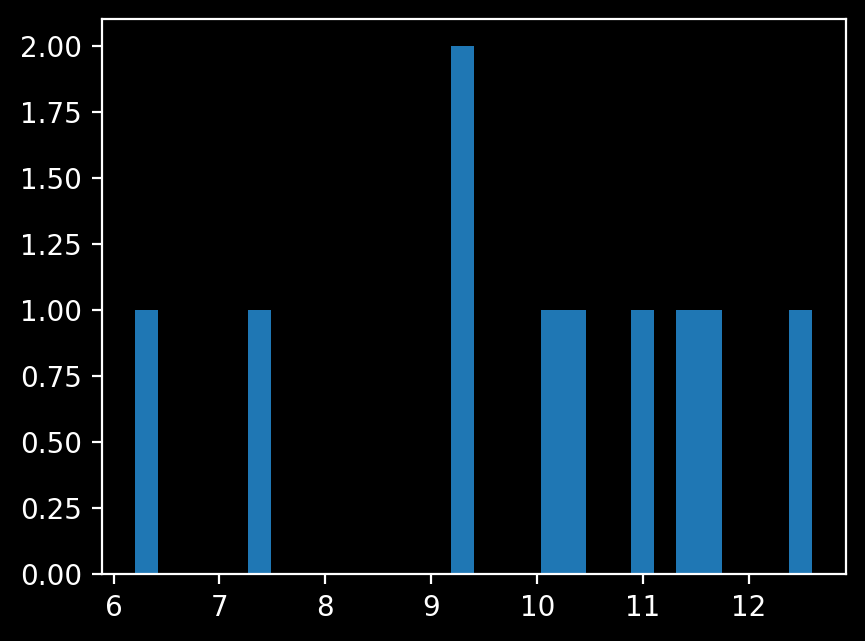

With 100 values 


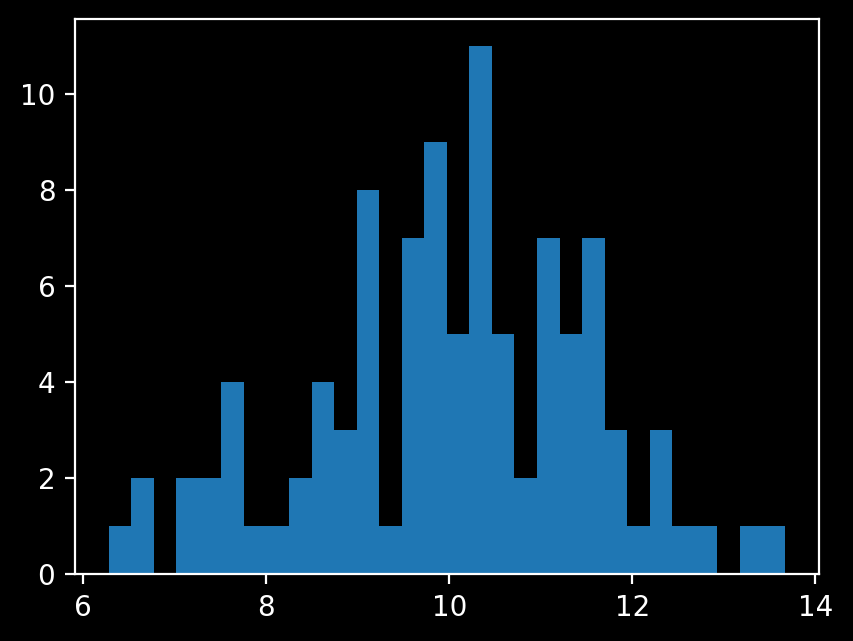

With 10000 values 


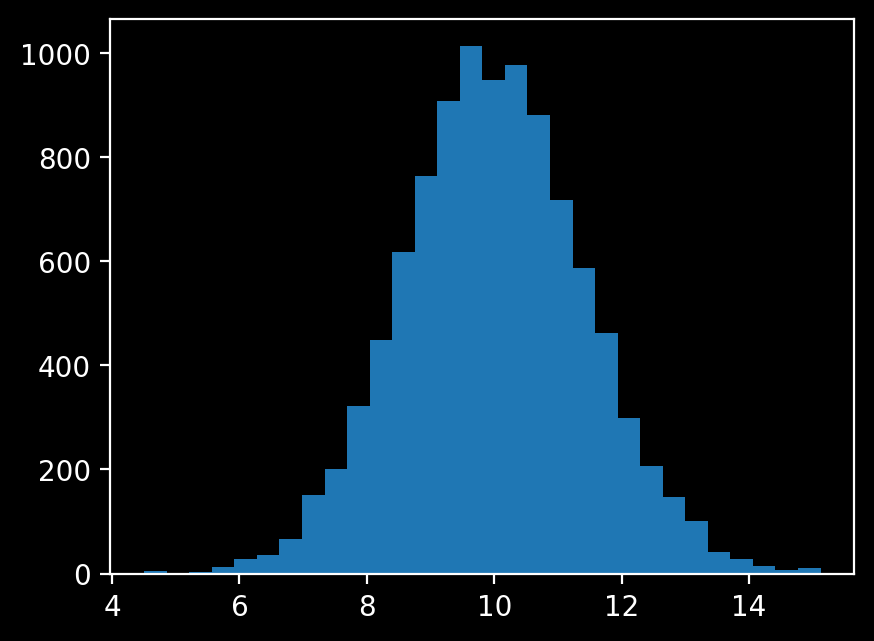

With 1000000 values 


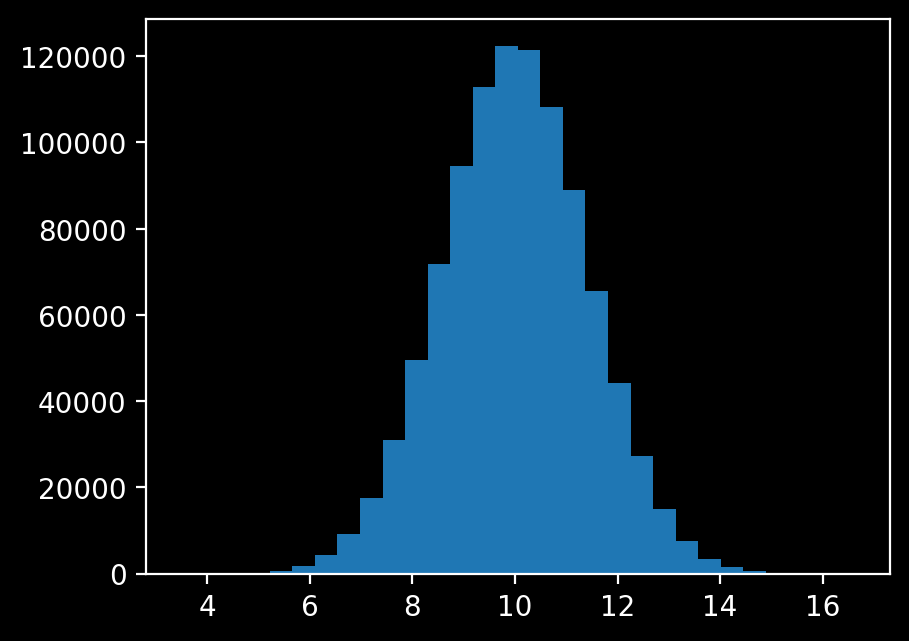

In [1]:
# Your code here
import numpy as np
from numpy import random as rnd
from matplotlib import pylab as plt
nValues1 = 10
nValues2 = 10**2
nValues3 = 10**4
nValues4 = 10**6
nBins=30

a=rnd.normal(10, np.sqrt(2), nValues1)
b=rnd.normal(10, np.sqrt(2), nValues2)
c=rnd.normal(10, np.sqrt(2), nValues3)
d=rnd.normal(10, np.sqrt(2), nValues4)

arrs=[a,b,c,d]
nValues=[nValues1, nValues2, nValues3, nValues4]

for arr in range(len(arrs)):
    print(f"With {nValues[arr]} values ")
    plt.hist(arrs[arr], bins=nBins)
    plt.show()

## Exercise 2

As in the previous exercise, but now the number should be extracted from an exponential distribution of scale parameter = 2.0. You can find the description of the exponential distribution [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html)

With 10 values 


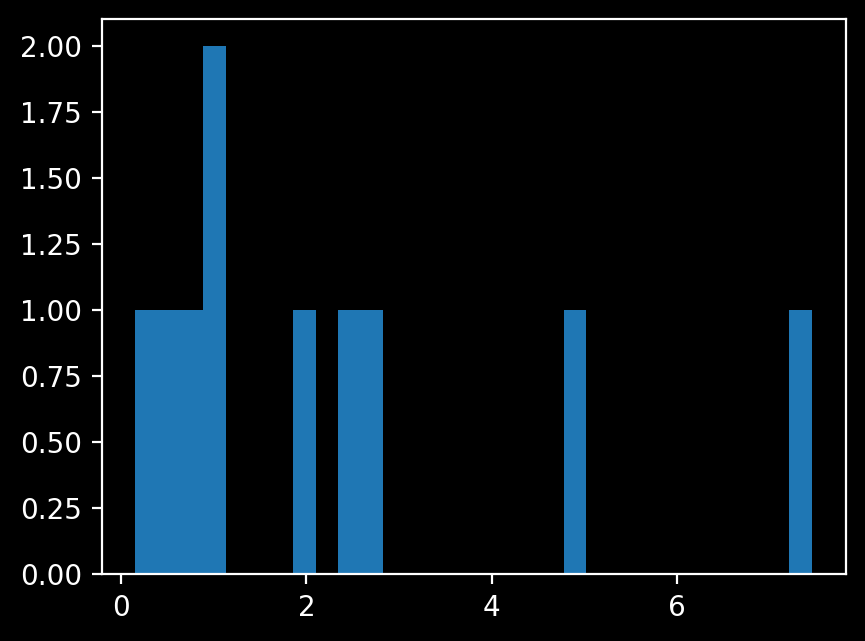

With 100 values 


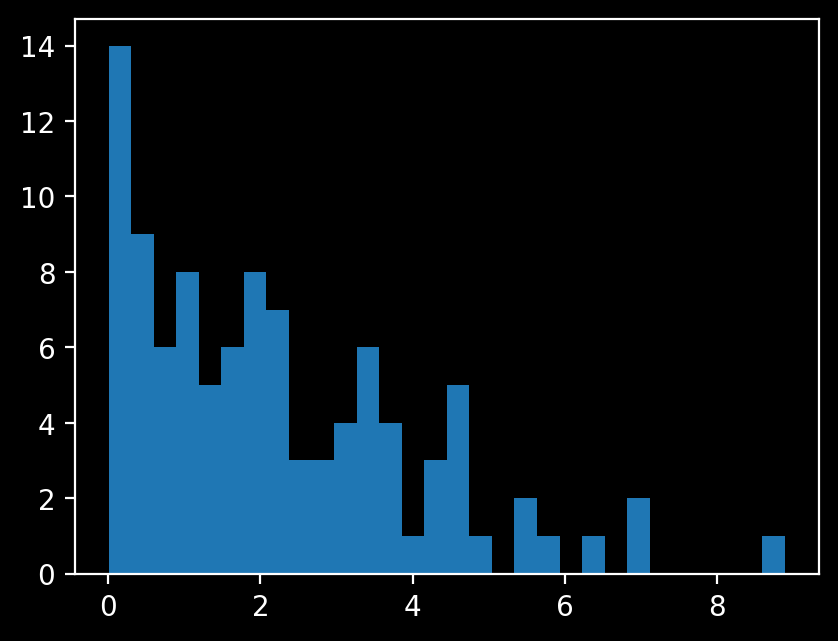

With 10000 values 


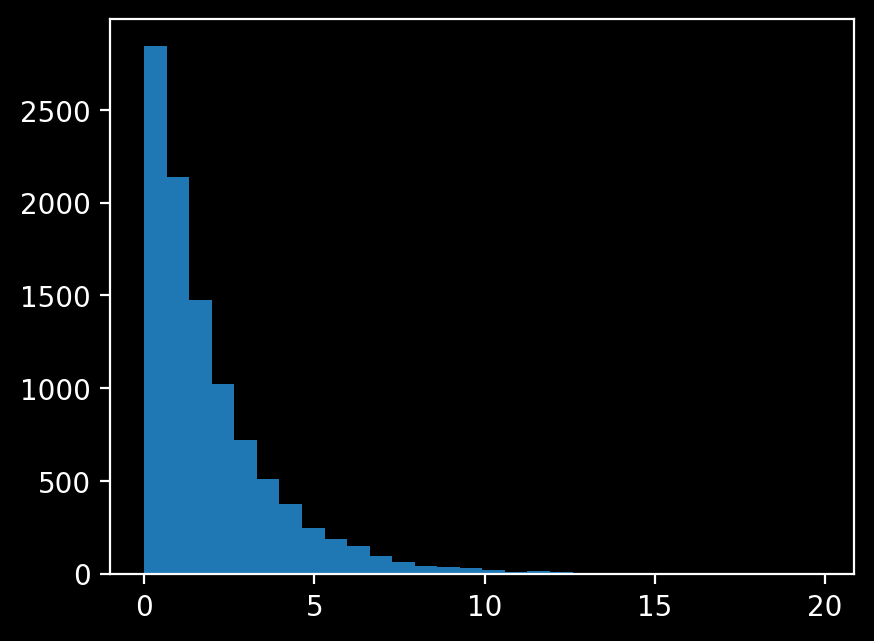

With 1000000 values 


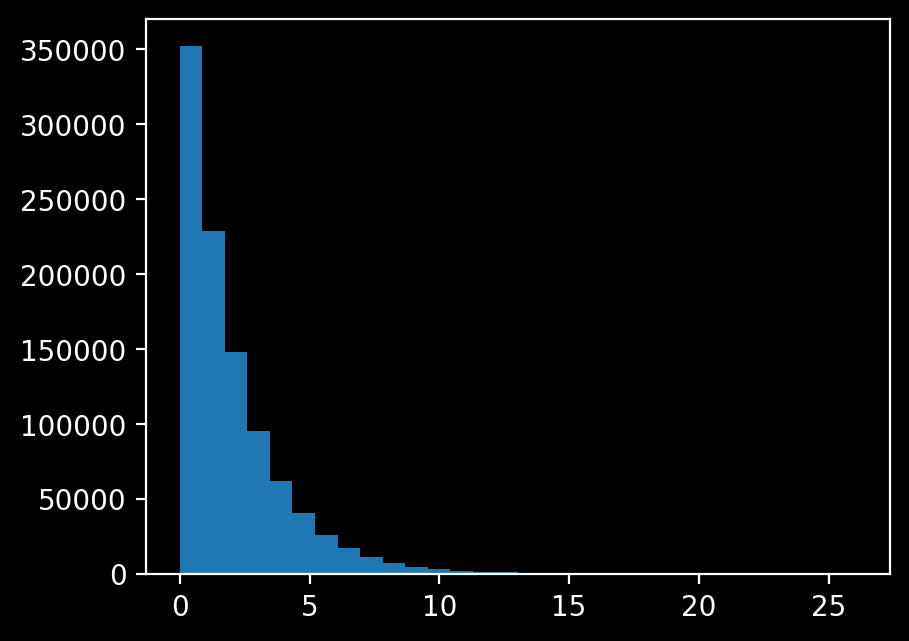

In [2]:
# Your code here

nValues1 = 10
nValues2 = 10**2
nValues3 = 10**4
nValues4 = 10**6
nBins=30

a=rnd.exponential(scale=2.0, size=nValues1)
b=rnd.exponential(2, nValues2)
c=rnd.exponential(2, nValues3)
d=rnd.exponential(2, nValues4)

arrs=[a,b,c,d]
nValues=[nValues1, nValues2, nValues3, nValues4]

for arr in range(len(arrs)):
    print(f"With {nValues[arr]} values ")
    plt.hist(arrs[arr], bins=nBins)
    plt.show()

In [13]:
np.random.Generator.exponential(scale=1.0, size=1)

TypeError: descriptor 'exponential' of 'numpy.random._generator.Generator' object needs an argument

## Exercise 3)

1. Write a function myRandom( list1, list2, weights1 = None, weights2 = None ) that takes as input two lists. 
and, optionally, a set of weights (probabilities). The function randomly take one element from the first 
and one element from the second and returns the tuple ( element1, element2 ). Remember that randomly here means that, given a large enough sample, the fraction of times a certain element will be picked is given by `weight[i] / sum_i weight[ i ]`, where `weight[i]` is the probability of extracting element `i`.

2. Using the previous function, write a second function `myRandomArray` that takes as input the two lists and a number NN. The function then generates an array where each element is a tuple previously extracted. 

**Extra part**

3.  Plot the fraction of times each tuple (element1, element2) is extracted as a heat map, using the lists `[ 1, 2, 3, 4, 5 ]` and `[ "a", "b", "c" ]`. A heat map is nothing but a graph where at each coordinate (x,y) a color of a certain intensity (the scale of the heatmap) is associated. For plotting heat-maps, you might want to consult the [link](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) as an example.

4. As in 3. above, but now the weights associated to the first list (`[1,2,3,4,5]` ) should be `[0.1, 0.1, 0.1, 0.35, 0.35 ]`, whereas the weights for the second list are all equal.

Question: What do you see comparing the heat maps in 3) and 4)? 


In [4]:

def myRandom( list1, list2, weight1 = None, weight2 = None ):
    # Your code here
    x1=rnd.choice(list1, size=1, replace=True, p=weight1 )[0]
    x2=rnd.choice(list2, size=1, replace=True, p=weight2 )[0]
    return ( x1, x2 )

def myRandomArray( list1, list2, NN, weight1 = None, weight2 = None ):
    # Your code here
    i=0
    newList=[]
    while i<NN:
        newList.append(myRandom(list1, list2, weight1, weight2))
        i+=1
        
    myArray=np.array(newList)
    return myArray



In [5]:
list1 = [1,2,3,4,5]
list2 = ["a", "b", "c"]

myRandom(list1, list2)

(4, 'a')

In [6]:
myRandomArray(list1, list2, 10)

array([['2', 'c'],
       ['2', 'c'],
       ['3', 'c'],
       ['2', 'b'],
       ['1', 'a'],
       ['2', 'c'],
       ['1', 'c'],
       ['4', 'b'],
       ['1', 'c'],
       ['4', 'c']], dtype='<U21')

## Exercise 4: Arbitrary probability distribution ( Advanced exercise )

In general, one can extract random number from any (valid) probability distribution following a simple
algorithm, which the exercises here asks you to code.

To do that, you start with a probability distribution $f(x)$ (meaning that $f(x)dx$ is proportional to the probability to extract a number from x to x+dx). $x$ belongs to the interval: $[a,b]$. The algorithm goes like this:

1. Extract a random number "x" between 0 and 1,
2. The random number generated is the number y for which the following condition holds:
   $\int_a^y f(x')dx' / \int_a^b f(x')dx' = x$ (assuming $a\lt y \lt b$).
   
Following the scheme above, write a function `generate( x, y, NN )` that takes an arbitrary probability distribution and returns an array of `NN` values extracted from it. `x` is the array containing the grid points on which $f(x)$ is defined and $y = f(x)$. Note that a valid probability distribution defined over an interval `[a,b]` **must** have the following properties:

a. $\int_a^b f(x)dx < \infty$, or in other words the integral is finite  
b. $f(x)>0 \qquad \forall x$

Experiment with different arbitrary functions and plot the histogram of the generated random numbers (extract a set of N > 10^6 values, using 100 bins.) If done correctly, running the following cell should generate the exponential probability distribution of scale 2.

In [ ]:

def generate( x, y, NN ):
    #Insert your code here
    return

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10**4,10**5)
y = 1 / 2.0  np.exp( - x / 2.0 )
s = generate( x, y, 10**6 )
plt.hist( s, bins = 100)
plt.show()

## Exercise 5: Simulating Brownian Dynamics ( Advanced exercise )

Brownian dynamics describes the motion of large particles in a fluid (but, is used also to describe the motion of stock options!). We will see it with a simple example. 

A particle following Brownian dynamics in 1D moves at each step according to the following evolution equation:

$x( t + dt ) = x( t ) + ( 2 D dt )^{1/2} * G(0,1)$

where $G( 0, 1 )$ is a random number generated from a Gaussian of mean zero and variance 1, $dt$ is just a discrete amount of time (called time-step, set it to $10^{-3}$ here), and $D$ the particle diffusion coefficient (in arbitrary units).

For this exercise:

1. Write a function that generates the trajectory of the particle for `NN` timesteps. You can assume x( t = 0 ) = 0

2. Using the function defined in the previous point, write a program that repeat the simulation for `NSample` times, each time restarting from x = 0. You can store the particle trajectory for each of these repeats in a 2D array `traj`, where `traj[ i, j ]` is the position of particle `i` at timestep `j` ( or in other words, at time $t = dt * j$ ). You can store a subset of the values of x every `Nsize` timesteps, rather than for all timesteps simulated.

3. The average displacement after time t is defined as $x_{ave} = \langle x( t ) - x( 0 ) \rangle$ and the mean square displacement as $\sigma^2 = \langle ( x( t ) - x( 0 ) )^2 \rangle$, where $\langle \rangle$ means taking an average over all the `NSample` trajectories generated. By simulation or otherwise, estimate $x_{ave}$ and $\sigma^2$ after evolving the dynamics () for:   
 a) $10^2$ steps and NSample = $10^2$  
 b) $10^4$ steps and NSample = $10^2$  
 c) $10^4$ steps and NSample = $10^4$  
 d) $10^6$ steps and NSample = $10^2$  
 e) $10^6$ steps and NSample = $10^4$  
   
Question: How long does it take to compute all the values for the points b-e? Is there a better way than doing simulations to estimate these quantities?

In [ ]:
# Your code here

